In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [4]:

df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
x = df.drop('target', axis=1)
y = df['target']


In [10]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [11]:
models = {'Logistic Regressor':LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
def in_to_on(model, x_train, y_train, x_test, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in model.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [16]:
model_scores=in_to_on(models,x_train, y_train, x_test, y_test)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regressor': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

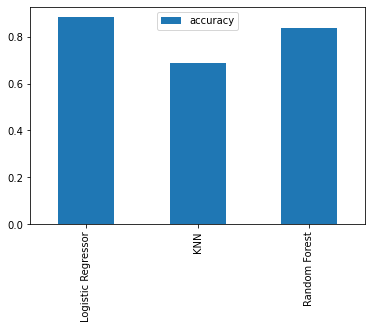

In [21]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [25]:
test_score =[]
neighbor = range(1, 21)
model = KNeighborsClassifier()
for i in neighbor:
    model.set_params(n_neighbors=i)
    model.fit(x_train, y_train)
    test_score.append(model.score(x_test, y_test))

test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

best score 75.41%


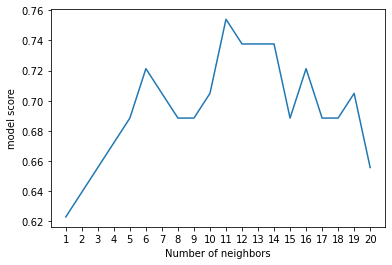

In [31]:
plt.plot(neighbor, test_score, label='Test score ')
plt.xticks(np.arange(1,21,1));
plt.xlabel('Number of neighbors');
plt.ylabel('model score');
print(f'best score {max(test_score)*100:.2f}%')

# hyperparameter RandomizeSearchCV

In [34]:
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver":['liblinear']}

rf_grid = {'n_estimators':np.arange(10, 1000, 50),
           "max_depth":[None, 3, 4,5, 7,8],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}


In [37]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train, y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
np.random.seed(42)

rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rf_reg.fit(x_train, y_train)

In [ ]:
rf_reg.best_param_

In [42]:
rf_reg.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 4}

In [44]:
rf_reg.score(x_test, y_test)

0.8688524590163934

# HyperParameter GridSearchCV Tune

In [45]:
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver":['liblinear']}
lg_reg = GridSearchCV(LogisticRegression(),
                     param_grid=log_reg_grid,
                     cv=5,
                     verbose=True)
lg_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
lg_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
lg_reg.score(x_test, y_test)

0.8852459016393442